# Preprocess for LC (weather data)

## Import LC data
### Some descriptions for variables: 
	DATEUTC = Date and time (UTC) in POSIXct format: YYYY-MM-DD HH:MM:SS
	ID = Station's ID (ex. LC-XXX) [-]
 	LC_HUMIDITY = Relative humidity [%]
	LC_DWPTEMP = Dew point temperature [癈]
	LC_n = Number of 16 second observations in 10 minutes aggregate
	LC_RAD = Solar radiation [W/m2]
	LC_RAININ = Rain intensity [mm/h]
	LC_DAILYRAIN = Daily rain sum [mm]
	LC_WINDDIR = Wind direction [癩
	LC_WINDSPEED = Wind speed [m/s]
	Date = Date in YYYY-MM-DD
	Year = Year in YYYY
	Month = Month in MM
	Day = Day in DD
	Hour = Hour in HH
	Minute = Minute in MM
	LC_RAD60 = Weighted radiation during last 60 minutes [W/m2]
	LC_TEMP_QCL0 = Temperature at QCL0 [癈]
	LC_TEMP_QCL1 = Temperature at QCL1 [癈]
	LC_TEMP_QCL2 = Temperature at QCL2 [癈]
	LC_TEMP_QCL3 = Temperature at QCL3 [癈]

In [33]:
import pandas as pd
lc_2022_q1 = pd.read_csv('s3://mda-maindata/LC_data/LC_2022Q1.csv')
print("Import finished")
lc_2022_q2 = pd.read_csv('s3://mda-maindata/LC_data/LC_2022Q2.csv')
print("Import finished")
lc_2022_q3 = pd.read_csv('s3://mda-maindata/LC_data/LC_2022Q3.csv')
print("Import finished")
lc_2022_q4 = pd.read_csv('s3://mda-maindata/LC_data/LC_2022Q4.csv')
print("Import finished")
lc_2022_q1.head()

Import finished
Import finished
Import finished
Import finished


,DATEUTC,ID,LC_HUMIDITY,LC_DWPTEMP,LC_n,LC_RAD,LC_RAININ,LC_DAILYRAIN,LC_WINDDIR,LC_WINDSPEED,...,Year,Month,Day,Hour,Minute,LC_RAD60,LC_TEMP_QCL0,LC_TEMP_QCL1,LC_TEMP_QCL2,LC_TEMP_QCL3
0,2022-01-01 00:10:00,LC-002,92.0,11.78,38.0,0.0,0.0,0.0,-169.0,0.43,...,2022,1,1,0,10,0.0,13.11,13.11,13.0515,13.048027
1,2022-01-01 00:20:00,LC-002,92.0,11.73,37.0,0.0,0.0,0.0,-170.0,0.33,...,2022,1,1,0,20,0.0,13.01,13.01,12.9515,12.985849
2,2022-01-01 00:30:00,LC-002,92.0,11.73,38.0,0.0,0.0,0.0,-167.0,0.46,...,2022,1,1,0,30,0.0,13.00,13.00,12.9415,12.950322
3,2022-01-01 00:40:00,LC-002,92.0,11.72,37.0,0.0,0.0,0.0,-160.0,0.52,...,2022,1,1,0,40,0.0,13.00,13.00,12.9415,12.949550
4,2022-01-01 00:50:00,LC-002,92.0,11.72,38.0,0.0,0.0,0.0,-166.0,0.51,...,2022,1,1,0,50,0.0,13.00,13.00,12.9415,12.952268


In [34]:
lc_2022 = pd.concat([lc_2022_q1,lc_2022_q2,lc_2022_q3,lc_2022_q4],axis=0)
lc_2022['DATEUTC'] = pd.to_datetime(lc_2022['DATEUTC'])
lc_2022.shape

(5546880, 21)

## Print the numbers of missing value for different variables

In [35]:
lc_2022.isna().sum()

DATEUTC              0
ID                   0
LC_HUMIDITY     314899
LC_DWPTEMP      314899
LC_n            314899
LC_RAD          314899
LC_RAININ       314899
LC_DAILYRAIN    314899
LC_WINDDIR      314899
LC_WINDSPEED    314899
Date                 0
Year                 0
Month                0
Day                  0
Hour                 0
Minute               0
LC_RAD60        277022
LC_TEMP_QCL0    314899
LC_TEMP_QCL1    345487
LC_TEMP_QCL2    345487
LC_TEMP_QCL3    345487
dtype: int64

## Compute the mean data groupby different time points （NA values would not be included when computing mean）

In [36]:
from tqdm import tqdm
lc_2022_avgbyid = []
lc_2022 = lc_2022.drop(['Date','Year','Month','Day','Hour','Minute'],axis=1)
for dateutc, group in tqdm(lc_2022.groupby('DATEUTC')):
    temp_lc = group.drop(['ID'],axis=1)
    temp_avg_lc = temp_lc.groupby('DATEUTC').mean()
    lc_2022_avgbyid.append(temp_avg_lc)
lc_2022_avgbyid = pd.concat(lc_2022_avgbyid,axis=0)


100%|██████████| 52560/52560 [01:14<00:00, 709.70it/s]


In [47]:
lc_2022_avgbyid = lc_2022_avgbyid.reset_index()
#lc_2022_avgbyid.to_csv('s3://mda-maindata/LC_data/lc_2022_avgbyid.csv',index=False)
lc_2022_avgbyid.shape

(52560, 15)

In [63]:
lc_2022_avgbyid.isna().sum()

index           0
DATEUTC         0
LC_HUMIDITY     0
LC_DWPTEMP      0
LC_n            0
LC_RAD          0
LC_RAININ       0
LC_DAILYRAIN    0
LC_WINDDIR      0
LC_WINDSPEED    0
LC_RAD60        0
LC_TEMP_QCL0    0
LC_TEMP_QCL1    0
LC_TEMP_QCL2    0
LC_TEMP_QCL3    0
dtype: int64

## Visualization on LC_TEMP_QCL0, LC_TEMP_QCL1, LC_TEMP_QCL2, LC_TEMP_QCL3

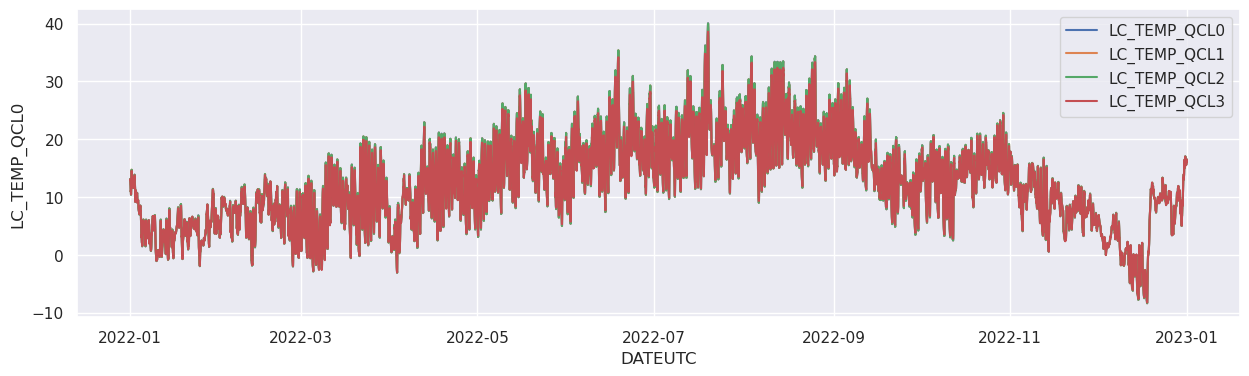

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(15, 4))
sns.set_theme(style="darkgrid")

#sns.lineplot(data = lc_2022_avgbyid, x= "DATEUTC", y= "LC_DWPTEMP",label = "LC_DWPTEMP")
sns.lineplot(data = lc_2022_avgbyid, x= "DATEUTC", y= "LC_TEMP_QCL0", label = "LC_TEMP_QCL0")
sns.lineplot(data = lc_2022_avgbyid, x= "DATEUTC", y= "LC_TEMP_QCL1", label = "LC_TEMP_QCL1")
sns.lineplot(data = lc_2022_avgbyid, x= "DATEUTC", y= "LC_TEMP_QCL2", label = "LC_TEMP_QCL2")
sns.lineplot(data = lc_2022_avgbyid, x= "DATEUTC", y= "LC_TEMP_QCL3", label = "LC_TEMP_QCL3")
plt.legend()


## Visualization on LC_DWPTEMP


<AxesSubplot:xlabel='DATEUTC', ylabel='LC_DWPTEMP'>

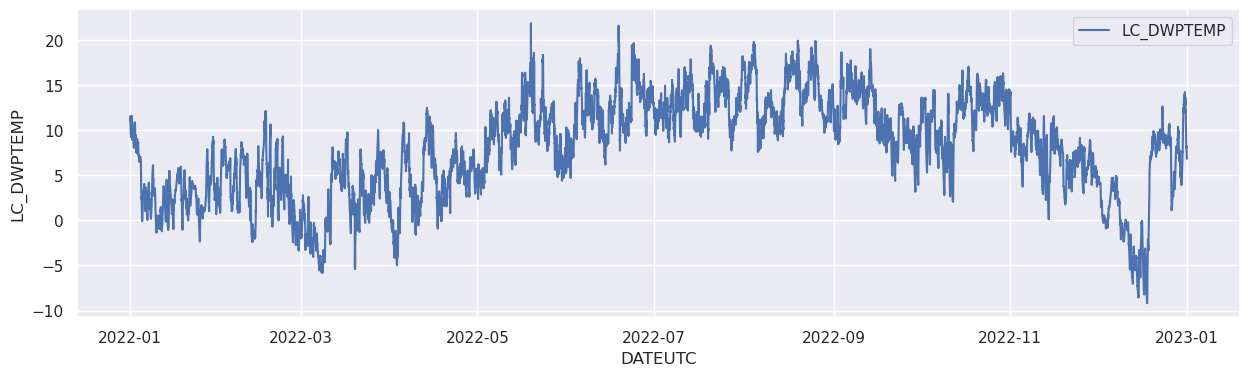

In [57]:
fig = plt.figure(figsize=(15, 4))
sns.set_theme(style="darkgrid")

sns.lineplot(data = lc_2022_avgbyid, x= "DATEUTC", y= "LC_DWPTEMP",label = "LC_DWPTEMP")

## Visualization on LC_RAININ

<AxesSubplot:xlabel='DATEUTC', ylabel='LC_RAININ'>

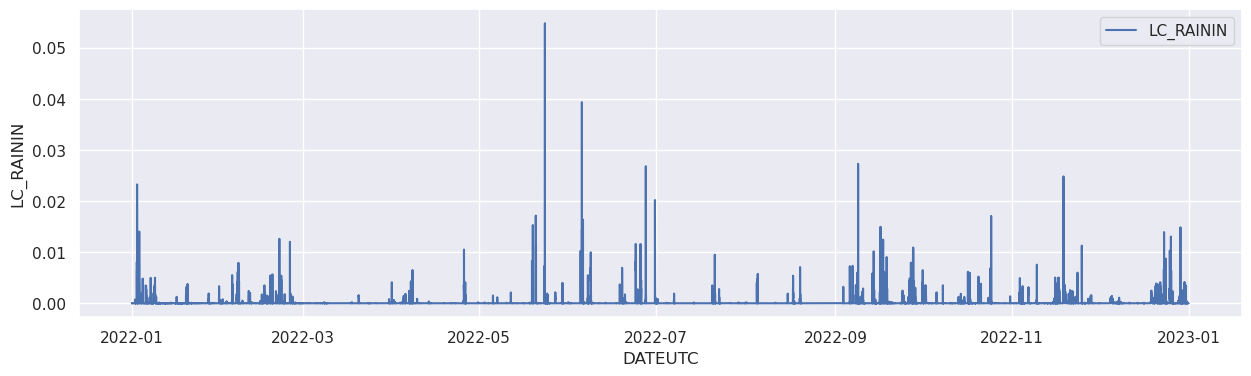

In [60]:
fig = plt.figure(figsize=(15, 4))
sns.set_theme(style="darkgrid")

sns.lineplot(data = lc_2022_avgbyid, x= "DATEUTC", y= "LC_RAININ",label = "LC_RAININ")

## Visualization on LC_WINDSPEED

<AxesSubplot:xlabel='DATEUTC', ylabel='LC_WINDSPEED'>

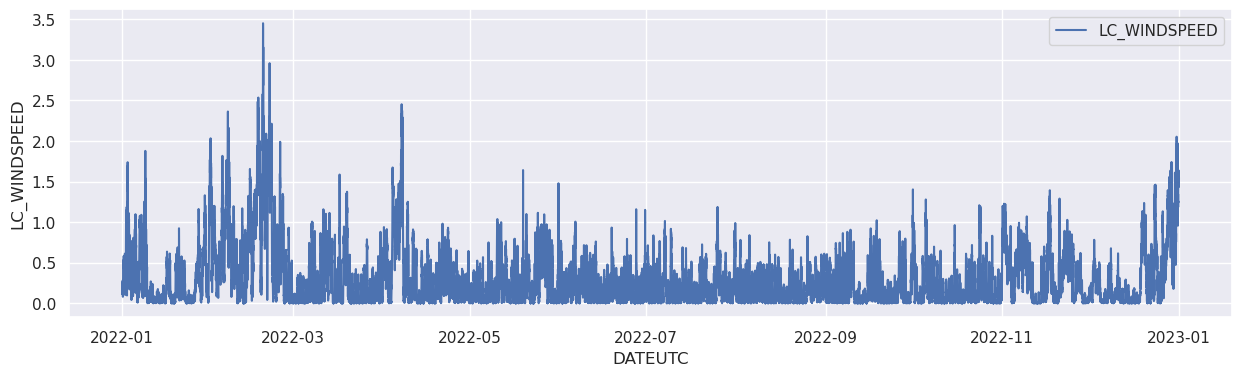

In [64]:
fig = plt.figure(figsize=(15, 4))
sns.set_theme(style="darkgrid")

sns.lineplot(data = lc_2022_avgbyid, x= "DATEUTC", y= "LC_WINDSPEED",label = "LC_WINDSPEED")

## Visualization on LC_RAD

<AxesSubplot:xlabel='DATEUTC', ylabel='LC_RAD'>

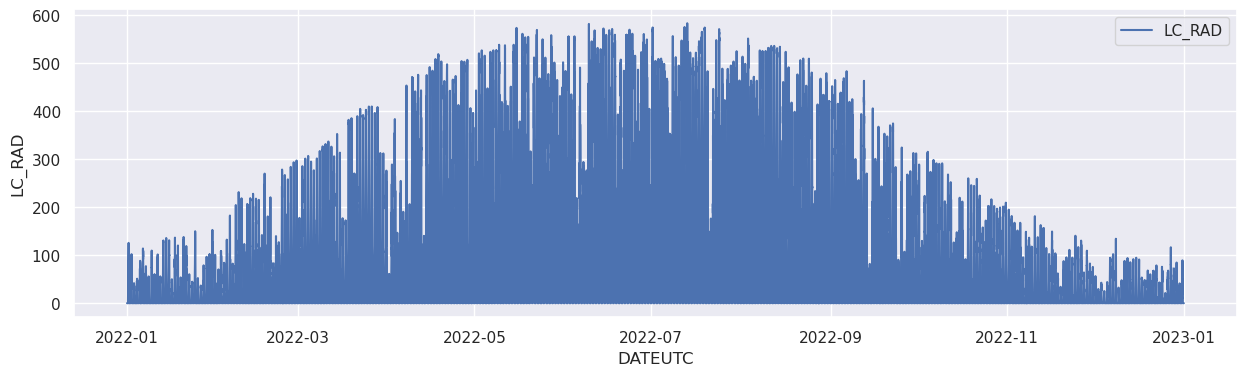

In [65]:
fig = plt.figure(figsize=(15, 4))
sns.set_theme(style="darkgrid")

sns.lineplot(data = lc_2022_avgbyid, x= "DATEUTC", y= "LC_RAD",label = "LC_RAD")

## Convert 'DATEUTC' (UTC time) to Brussels time zone in alignment with timestamp in noise data

In [ ]:
import pytz
from pytz import timezone
brussels_time = timezone('Europe/Brussels')
utc_tz = pytz.timezone('UTC')
lc_2022_avgbyid['DATEUTC'] = lc_2022_avgbyid['DATEUTC'].dt.tz_localize(utc_tz)
lc_2022_avgbyid['DATE_BRU'] = lc_2022_avgbyid['DATEUTC'].apply(lambda x: x.astimezone(brussels_time))
lc_2022_avgbyid.to_csv('lc_2022_avgbyid_timecoverted.csv',index=False)